In [1]:
# https://github.com/dmeoli
# !pip install --user umap.plot
# !pip install --user umap-learn[plot]

In [2]:
from sklearn.cluster import AgglomerativeClustering, MeanShift, DBSCAN
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import pandas as pd
import numpy as np
import os
import umap.plot
import umap
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

In [4]:
df = pd.read_csv('./data/Simulated_TCGA_data.tsv', sep='\t', index_col=None)
df = df.sample(500)
df0 = df[["SampleID", "CancerType"]].copy()
df.shape
df.head()

,SampleID,CancerType,Gene_A,Gene_B,Gene_C,Gene_D,Gene_E,Gene_F,Gene_G
894,Sample_0895,LGG,2.113943,1.146128,2.113943,3.182006,2.480496,0.00000,2.480496
946,Sample_0947,LGG,2.690196,1.690196,2.576341,3.650652,2.278353,0.30103,2.579383
307,Sample_0308,ACC,2.136721,1.342423,2.136721,3.879664,2.584275,0.00000,2.584275
1628,Sample_1629,CESC,2.164353,1.322219,2.164353,3.082328,2.505936,0.00000,2.505936
618,Sample_0619,BLCA,1.380211,0.000000,1.380211,0.000000,1.998259,0.00000,1.998259


In [5]:
numeric = df[["Gene_A", "Gene_B", "Gene_C", "Gene_D", "Gene_E", "Gene_F", "Gene_G"]].copy()
#df.head()

In [6]:
ordinal = df[["CancerType"]].copy()
#ordinal.head()

In [7]:
n_samples = df.shape[0]
df.drop_duplicates(ignore_index=True, inplace=True)
duplicates = n_samples - df.shape[0]
print('Number of canceled duplicates: {}/{} ({:.2f}%)'.format(duplicates, n_samples, duplicates / n_samples * 100))

Number of canceled duplicates: 0/500 (0.00%)


In [8]:
# sns.heatmap(df.isnull(), cbar=False);

In [9]:
#df.describe()

In [10]:
print(df.CancerType.value_counts())
#df.head()

CESC    137
ACC     114
BLCA     75
LGG      61
KIRP     58
BRCA     55
Name: CancerType, dtype: int64


Text(0, 0.5, 'Log2 Abundance Ratio')

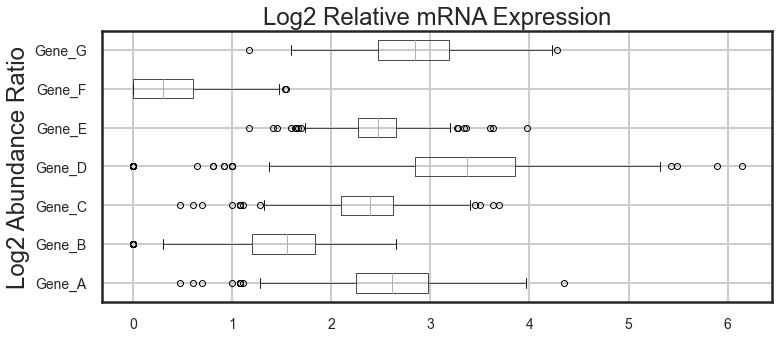

In [11]:
df.boxplot(figsize=(12,5), vert=False, fontsize=14)
plt.title('Log2 Relative mRNA Expression')
plt.ylabel('Log2 Abundance Ratio', fontsize='medium')

In [12]:
df =  df - df.median()

Text(0, 0.5, 'Log2 Abundance Ratio')

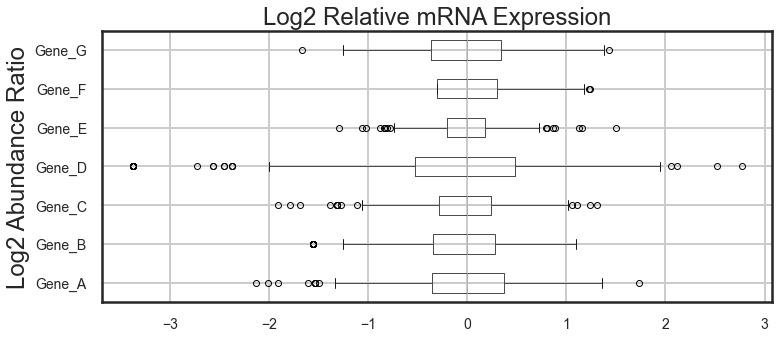

In [13]:
df.boxplot(figsize=(12,5), vert=False, fontsize=14)
plt.title('Log2 Relative mRNA Expression')
plt.ylabel('Log2 Abundance Ratio', fontsize='medium')

In [14]:
# sns.heatmap(df.corr(), annot=True);

In [15]:
# sns.pairplot(df, hue='CancerType', diag_kind='kde', height=1.5)

In [16]:
# f = df.hist(bins=100, sharex=True, figsize=(18,6) )
#plt.suptitle('Protein Log2 Abundance Ratios')
#plt.xlim(-2, 2)

In [17]:
scaled_numeric = RobustScaler().fit_transform(numeric)
# scaled_numeric[:5]

In [18]:
ordinal["CancerType"] = ordinal.CancerType.map({"ACC":0, "BLCA":1, "LGG":2, "BRCA":3, "CESC":4, "KIRP":5})

In [19]:
%%time
numeric_mapper = umap.UMAP(n_neighbors=150, random_state=42).fit(scaled_numeric)
ordinal_mapper = umap.UMAP(metric="manhattan", n_neighbors=150, random_state=42).fit(ordinal.values)

CPU times: total: 40.4 s
Wall time: 40.4 s


<AxesSubplot:>

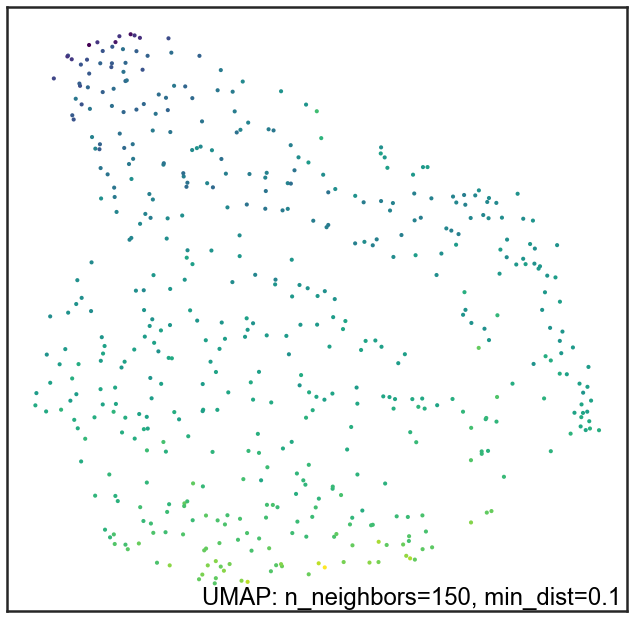

In [20]:
umap.plot.points(numeric_mapper, values=df["Gene_A"], cmap="viridis")

In [21]:
# umap.plot.diagnostic(numeric_mapper, diagnostic_type='local_dim')

In [22]:
#umap.plot.diagnostic(numeric_mapper, diagnostic_type='neighborhood')

In [23]:
df0

,SampleID,CancerType
894,Sample_0895,LGG
946,Sample_0947,LGG
307,Sample_0308,ACC
1628,Sample_1629,CESC
618,Sample_0619,BLCA
...,...,...
1384,Sample_1385,CESC
1515,Sample_1516,CESC
1428,Sample_1429,CESC
694,Sample_0695,BLCA


<AxesSubplot:>

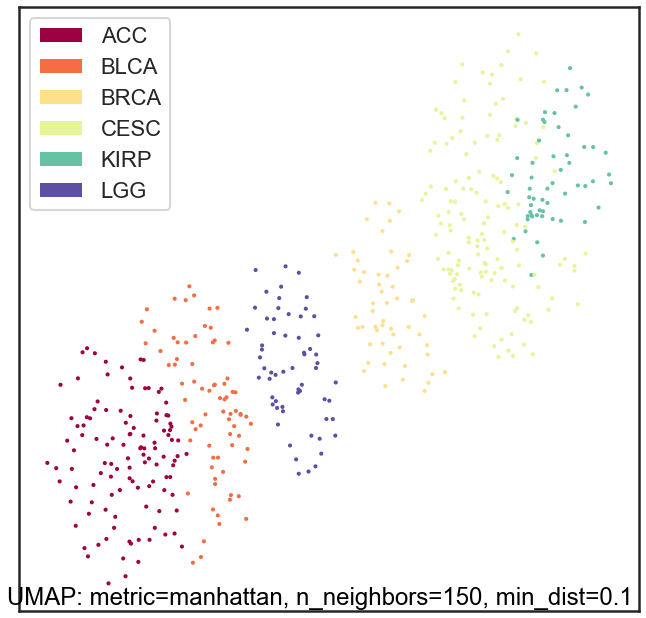

In [24]:
umap.plot.points(ordinal_mapper, labels=df0["CancerType"])

In [25]:
df0.head()

,SampleID,CancerType
894,Sample_0895,LGG
946,Sample_0947,LGG
307,Sample_0308,ACC
1628,Sample_1629,CESC
618,Sample_0619,BLCA


In [26]:
hover_data = pd.DataFrame(df0)

hover_data[""] = hover_data.CancerType.map(
    {
        '0':'ACC',
        '1':'BLCA',
        '2':'LGG',
        '3':'BRCA',
        '4':'CESC',
        '5':'KIRP'
    }
)

In [27]:
umap.plot.output_notebook()

Loading BokehJS ...

In [28]:
#p = umap.plot.interactive(numeric_mapper, labels=df0.CancerType, hover_data=hover_data, point_size=10)
p = umap.plot.interactive(numeric_mapper, labels=df0.CancerType, hover_data=hover_data, point_size=10)
umap.plot.show(p)